# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import *
from collections import Counter
import chart_studio
import chart_studio.plotly as py
import config
import plotly.graph_objects as go
import os
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Configs

In [2]:
username=config.username
api_key=config.my_plotly_api_key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

stopwords = set(STOPWORDS)

## Data Read

In [3]:
df = pd.read_pickle("data/data_feature_extracted.pkl")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100099 entries, 0 to 100098
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          100099 non-null  object
 1   text_cleaned  100099 non-null  object
 2   account_tags  100099 non-null  object
 3   hash_tags     100099 non-null  object
 4   emoji_lists   38308 non-null   object
 5   sentiment     100099 non-null  object
 6   emotion       100099 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [5]:
df.head()

text  \
0  RT @POTUS: As we celebrate the progress we’ve ...   
1  This #EarthDay, I'm happy to be meeting with P...   
2  RT @Khan__sir_patna: All of people wishes and ...   
3  RT @CapsCoalition: Biden Signs Executive Order...   
4  RT @tamannaahspeaks: Animals source their food...   

                                        text_cleaned  \
0   As we celebrate the progress we’ve made this ...   
1  This #EarthDay, I'm happy to be meeting with P...   
2   All of people wishes and happy earth day #Ear...   
3   Biden Signs Executive Order on Natural Capita...   
4   Animals source their food from soil but our s...   

                                account_tags                  hash_tags  \
0                                    [POTUS]                         []   
1                          [PennEnvironment]  [EarthDay, GetTheLeadOut]   
2                          [Khan__sir_patna]                 [EarthDay]   
3                            [CapsCoalition]                 [EarthDay]   
4  [tamannaahspeaks, SadhguruJV, cpsavesoil]        [MyconnectwithSoil]   

  emoji_lists sentiment   emotion  
0        None  POSITIVE  Optimism  
1        None  POSITIVE  Optimism  
2        None  POSITIVE       Joy  
3        None  POSITIVE  Optimism  
4        None  POSITIVE  Optimism

# Sentiment Analysis

In [6]:
dict_sentiment = dict(df.sentiment.value_counts())
dict_sentiment

{'POSITIVE': 66089, 'NEGATIVE': 34010}

In [7]:
fig1 = go.Figure(data=[
    go.Bar(
        x=list(dict_sentiment.keys()),
        y=list(dict_sentiment.values()),
        text=list(dict_sentiment.values()),
        textposition='auto',
        opacity=0.7
    )
])

fig1.update_layout(title={
    'text': "Sentiment Distribution | Full Data",
    'x': 0.5,
    'xanchor': 'center'
})
fig1.update_yaxes(title='Count').update_xaxes(title='Sentiment')
fig1.update_layout(hovermode=False)
fig1.show()

In [8]:
# CODE 2- Problem with uploading because of the large data size

# fig1 = px.histogram(df,
#                    x="sentiment",
#                    template='plotly_white',
#                    color="sentiment"
#                   )
# fig1.update_layout(
#     title={
#         'text': "Sentiment Count",
#         'x' : 0.5,
#         'xanchor': 'center'
#     })
# fig1.update_yaxes(title='Count').update_xaxes(title='Sentiment')
# fig1.show()

In [9]:
# py.plot(fig1, filename="Sentiment Count|EarthDay2022", auto_open = True)

# Emotion Analysis

In [10]:
dict_emotion = dict(df.emotion.value_counts())
dict_emotion

{'Joy': 56309, 'Optimism': 35554, 'Anger': 4800, 'Sadness': 3436}

In [11]:
fig2 = go.Figure(data=[
    go.Bar(
        x=[each_label for each_label in list(dict_emotion.keys())],
        y=list(dict_emotion.values()),
        text=list(dict_emotion.values()),
        textposition='auto',
        opacity=0.7
    )
])

fig2.update_layout(title={
    'text': "Emotion Distribution | Full Data",
    'x': 0.5,
    'xanchor': 'center'
})
fig2.update_yaxes(title='Count').update_xaxes(title='Emotion')
fig2.update_layout(hovermode=False)
fig2.show()

In [12]:
# py.plot(fig2, filename="Emotion Count|EarthDay2022", auto_open = True)

In [13]:
# CODE 2- Problem with uploading because of the large data size

# fig2 = px.histogram(df,
#                    x="emotion",
#                    template='plotly_white',
#                    color="emotion"
#                   )
# fig2.update_layout(
#     title={
#         'text': "Emotion Count",
#         'x' : 0.5,
#         'xanchor': 'center'
#     })
# fig2.update_layout(
#     hoverlabel=dict(
#         font_color="white",
#         bordercolor="white"
#     )
# )
# fig2.update_yaxes(title='Count').update_xaxes(title='Sentiment')
# fig2.show()

# Sentiment and Emotion Anaysis

In [14]:
df_grouped = df.groupby(['emotion', 'sentiment']).count()['text'].reset_index()
df_grouped

emotion sentiment   text
0     Anger  NEGATIVE   4035
1     Anger  POSITIVE    765
2       Joy  NEGATIVE  14241
3       Joy  POSITIVE  42068
4  Optimism  NEGATIVE  12821
5  Optimism  POSITIVE  22733
6   Sadness  NEGATIVE   2913
7   Sadness  POSITIVE    523

In [15]:
fig3 = px.bar(df_grouped,
              x="text",
              y="emotion",
              template='plotly_white',
              color_discrete_sequence=['#EF553B', '#636EFA'],
              color="sentiment",
              opacity=0.7)

fig3.update_layout(title={
    'text': "Sentiment Distribution per Emotion | Full Data",
    'x': 0.5,
    'xanchor': 'center'
})
fig3.update_layout(hoverlabel=dict(font_color="white", bordercolor="white"))
fig3.update_yaxes(title='Count').update_xaxes(title='Sentiment')
fig3.update_layout(legend=dict(title="<b>Sentiment:</b>"))
fig3.update_traces(hovertemplate='%{value}')
fig3.show()

In [16]:
# py.plot(fig3, filename="Emotion and Sentiment 1|EarthDay2022", auto_open = True)

In [17]:
fig4= px.sunburst(
    df_grouped,
    path=['sentiment', 'emotion'],
    values='text'
)
fig4.update_traces(hovertemplate='%{value}', textfont_color="white")
fig4.update_layout(hoverlabel=dict(font_color="white", bordercolor="white"))
fig4.update_layout(title={
    'text': "Sentiment and Emotion Proportion | Full Data",
    'x': 0.5,
    'xanchor': 'center'
})
fig4.show()

In [18]:
# py.plot(fig4, filename="Emotion and Sentiment 2|EarthDay2022", auto_open = True)

In [19]:
# CODE 2- Problem with uploading because of the large data size

# fig3 = px.histogram(df,
#                     x="emotion",
#                     template='plotly_white',
#                     color="sentiment",
#                     opacity=0.7)
# fig3.update_layout(title={
#     'text': "Sentiment Count",
#     'x': 0.5,
#     'xanchor': 'center'
# })
# fig3.update_layout(hoverlabel=dict(font_color="white", bordercolor="white"))
# fig3.update_yaxes(title='Count').update_xaxes(title='Sentiment')
# fig3.show()

# Keyword Analysis

## Percentage of Tweets containing one or more keywords - Pie Chart

In [20]:
def gen_label(dict_val_counts, term):
    """
    Replaces True and False in 'dict_val_counts' keys with 
    Contains <term> for True and Does not Contain <term> for False
    """
    new_dict_val_counts = {}
    for key, value in dict_val_counts.items():
        if key:
            new_label = "Contains \"{}\"".format(term)
            new_dict_val_counts[new_label] = value
        else:
            new_label = "Does not Contain \"{}\"".format(term)
            new_dict_val_counts[new_label] = value
    return dict(sorted(new_dict_val_counts.items()))


def show_pie_chart(dict_data_for_pie):
    """
    Generates Pie-Chart
    """
    colors = ['navyblue', 'lightgrey']
    figx = go.Figure(data=[
        go.Pie(labels=list(dict_data_for_pie.keys()),
               values=list(dict_data_for_pie.values()),
               hole=.5,
               opacity=0.7)
    ])
    if len(list(dict_data_for_pie.keys())) == 1:
        if 'Does' in list(dict_data_for_pie.keys())[0]:
            colors = ['lightgrey']
        else:
            colors = ['navyblue']
    figx.update_traces(hoverinfo='label+percent',
                       textfont_size=14,
#                        textfont_color="white",
                       marker=dict(colors=colors,
                                   line=dict(color='white', width=1)))
    figx.update_layout(hoverlabel=dict(font_color="white",
                                       bordercolor="white"),
                       legend=dict(traceorder="reversed"))
    figx.update_layout(title={
        'text': "Keyword Percentage Pie Chart for 'future' | Full Data",
        'x': 0.5,
        'xanchor': 'center'
    })
    figx.show()
#     py.plot(figx, filename="Keyword Analysis Pie Chart |EarthDay2022", auto_open = True)


def process_term(df, keyword):
    """
    Filter data by keyword, and get value_count, 
    build pie-chart with the information
    """
    df['has_term'] = df.text.str.lower().str.contains(keyword)
    dict_has_term = dict(df.has_term.value_counts())
    labelled_counts = gen_label(dict_has_term, keyword)
    show_pie_chart(labelled_counts)
    return labelled_counts

In [21]:
process_term(df, 'future')

{'Contains "future"': 7013, 'Does not Contain "future"': 93086}

In [22]:
process_term(df, 'future&next') # Can use | or & for or/and query terms

{'Does not Contain "future&next"': 100099}

In [23]:
process_term(df, 'future|next')

{'Contains "future|next"': 8052, 'Does not Contain "future|next"': 92047}

## Buttons for Keywords:Pie Chart

In [24]:
keywords_list = [
    'future', 'save', 'climate', 'soil', 'celebrate', 'planet',
    'environment', 'care', 'crisis'
]

In [25]:
button_info = []
plots = []
for i, each_keyword in enumerate(keywords_list):
    visibility = [False] * len(keywords_list)
    visibility[i] = True
    df['has_term'] = df.text.str.lower().str.contains(each_keyword)
    dict_has_term = dict(df.has_term.value_counts())
    dict_data_for_pie = gen_label(dict_has_term, each_keyword)
    plots.append(
        go.Pie(labels=list(dict_data_for_pie.keys()),
               values=list(dict_data_for_pie.values()),
               hole=.5,
               opacity=0.7))
    button_info.append(
        dict(label=each_keyword,
             method="update",
             args=[{
                 "visible": visibility
             }, {
                 "title": "Keyword Percentage Pie Chart: {}".format(each_keyword.capitalize())
             }]))

figx = go.Figure(data=plots)
colors = ['navyblue', 'lightgrey']
figx.update_layout(title={'text': "Keyword Percentage", 'x': 0.5, 'xanchor': 'center'})
figx.update_traces(hovertemplate='%{value}')
if len(list(dict_data_for_pie.keys())) == 1:
        if 'Does' in list(dict_data_for_pie.keys())[0]:
            colors = ['lightgrey']
        else:
            colors = ['navyblue']
figx.update_traces(hoverinfo='label+percent',
                   textfont_size=14,
#                        textfont_color="white",
                   marker=dict(colors=colors,
                               line=dict(color='white', width=1)))
figx.update_layout(hoverlabel=dict(font_color="white",
                                   bordercolor="white"),
                   legend=dict(traceorder="reversed"))
figx.update_layout(
    updatemenus=[dict(type="buttons", 
                      direction="down", 
                      buttons=button_info)])
figx.show()
# py.plot(figx, filename="Keyword Percentage Pie Charts|EarthDay2022", auto_open = True)

## Percentage of Tweets containing one or more keywords - SunBurst Chart

In [26]:
def gen_sunburst_per_term_query(df, term):
    df['has_term'] = df.text.str.lower().str.contains(term)
    df_grouped_term = df[df['has_term'] == True].groupby(
        ['emotion', 'sentiment']).count()['text'].reset_index()
    figy = px.sunburst(df_grouped_term,
                       path=['sentiment', 'emotion'],
                       values='text')
    figy.update_layout(title={
        'text': "Emotion and Sentiment Proportions for '{}'".format(term.upper()),
        'x': 0.5,
        'xanchor': 'center'
    })
    figy.update_traces(hovertemplate='%{value}', textfont_color="white")
    figy.update_layout(hoverlabel=dict(font_color="white",
                                       bordercolor="white"))
    figy.show()
#     py.plot(figy, filename="Keyword Analysis Sunburst Chart|EarthDay2022", auto_open = True)

In [27]:
gen_sunburst_per_term_query(df, 'future')

## Buttons for Keywords:Sunburst

In [28]:
button_info = []
plots = []
for i, each_keyword in enumerate(keywords_list):
    visibility = [False] * len(keywords_list)
    visibility[i] = True
    df['has_term'] = df.text.str.lower().str.contains(each_keyword)
    df_grouped_term = df[df['has_term'] == True].groupby(
        ['emotion', 'sentiment']).count()['text'].reset_index()
    trace = px.sunburst(df_grouped_term, path=['sentiment', 'emotion'], values='text').select_traces()
    plots.append([each for each in trace][0])
    button_info.append(
        dict(label=each_keyword,
             method="update",
             args=[{
                 "visible": visibility
             }, {
                 "title":
                 "Emotion and Sentiment Proportions for '{}'".format(
                     each_keyword.capitalize())
             }]))

figy = go.Figure(data=plots)
figy.update_layout(title={
    'text': "Emotion and Sentiment Proportions",
    'x': 0.5,
    'xanchor': 'center'
})
figy.update_traces(hovertemplate='%{value}')
figy.update_layout(
    updatemenus=[dict(type="buttons", direction="down", buttons=button_info)])
figy.show()
# py.plot(figy,
#         filename="Proportions Sunburst Pie Charts|EarthDay2022",
#         auto_open=True)

# Emoji Analysis

In [29]:
emoji_list = [each for each_list in list(df['emoji_lists']) if each_list is not None for each in each_list ]

In [30]:
c = Counter(emoji_list)
c.most_common(5)

[('🌎', 19465), ('🌍', 7375), ('🌱', 5060), ('💚', 4711), ('🌏', 3989)]

In [31]:
c.most_common(5)

[('🌎', 19465), ('🌍', 7375), ('🌱', 5060), ('💚', 4711), ('🌏', 3989)]

In [32]:
plt_emoji_list = dict(c.most_common(30)).keys()
plt_emoji_counts = dict(c.most_common(30)).values()

In [33]:
fig5 = px.bar(x=plt_emoji_list,
              y=plt_emoji_counts,
              template='plotly_white',
              opacity=0.7
             )
fig5.update_layout(title={
    'text': "Top 30 Emoji Count | Full Data",
    'x': 0.5,
    'xanchor': 'center'
})
fig5.update_layout(
    hoverlabel=dict(
        font_color="white",
        bordercolor="white"
    )
)
fig5.update_yaxes(title='Count').update_xaxes(title='Emojis')
fig5.show()
# py.plot(fig5, filename="Top 30 Emoji Count|EarthDay2022", auto_open = True)

## Emoji Count by Emotion

In [34]:
for each_emo in list(df.emotion.unique()):
    emoji_list = [
        each for each_list in list(df[df['emotion']==each_emo]['emoji_lists']) if each_list is not None
        for each in each_list
    ]
    c = Counter(emoji_list)
    plt_emoji_list = dict(c.most_common(30)).keys()
    plt_emoji_counts = dict(c.most_common(30)).values()
    fig6 = px.bar(x=plt_emoji_list,
                  y=plt_emoji_counts,
                  template='plotly_white',
                  opacity=0.7)
    fig6.update_layout(title={
        'text': "Top 30 Emoji Count | " + each_emo,
        'x': 0.5,
        'xanchor': 'center'
    })
    fig6.update_layout(
        hoverlabel=dict(font_color="white", bordercolor="white"))
    fig6.update_yaxes(title='Count').update_xaxes(title='Emojis')
    fig6.show()
#     if each_emo == "Sadness":
#         py.plot(fig6, filename="Top 30 Emoji Count Sadness|EarthDay2022", auto_open = True)

# WordCloud

In [35]:
def generate_wordcloud(text: str, title: str, file_name: str):
    wc = WordCloud(width=800,
                   height=400,
                   background_color="rgba(255, 255, 255, 0)",
                   mode="RGBA",
                   font_step=1,
                   max_words=500,
                   stopwords=stopwords,
                   colormap='gist_earth',
                   collocations=False).generate_from_text(text)

    plt.figure(figsize=(20, 10), facecolor=None)
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(file_name)
    plt.show()

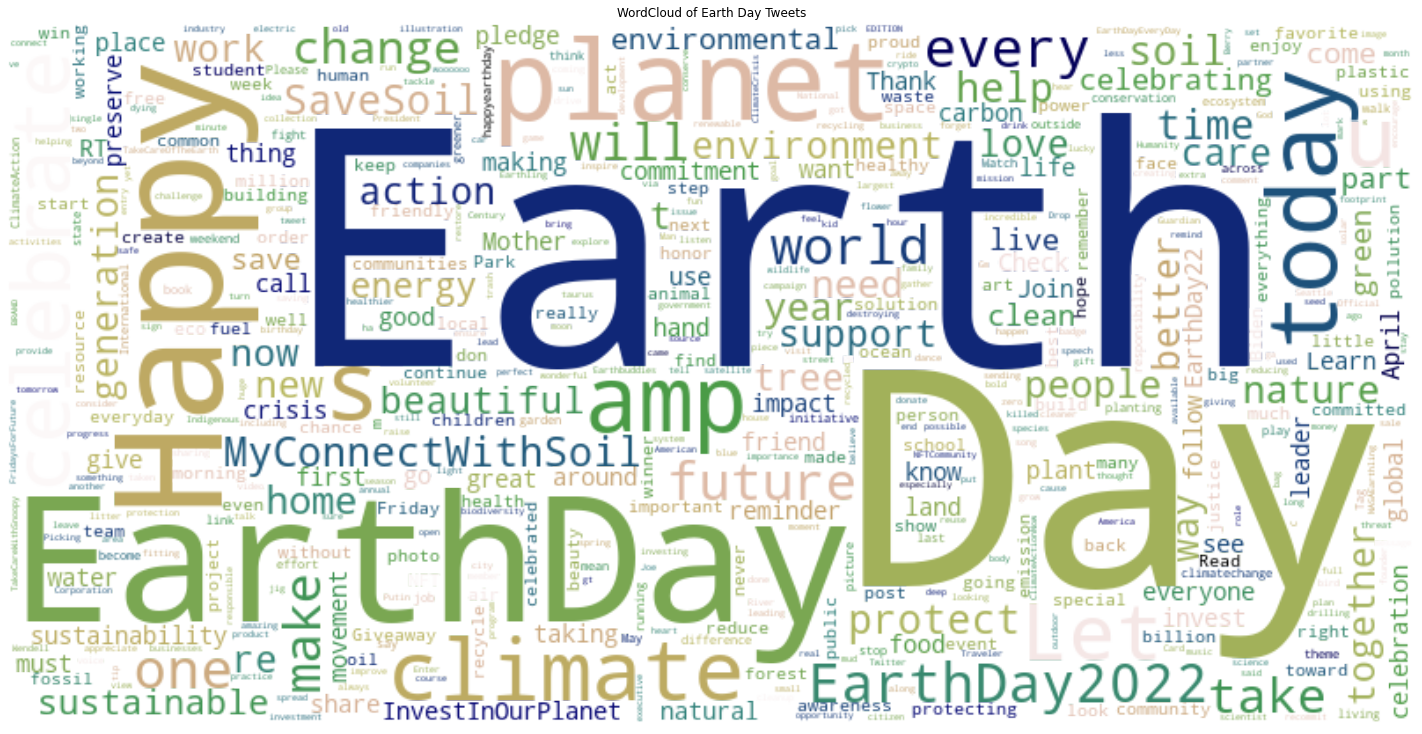

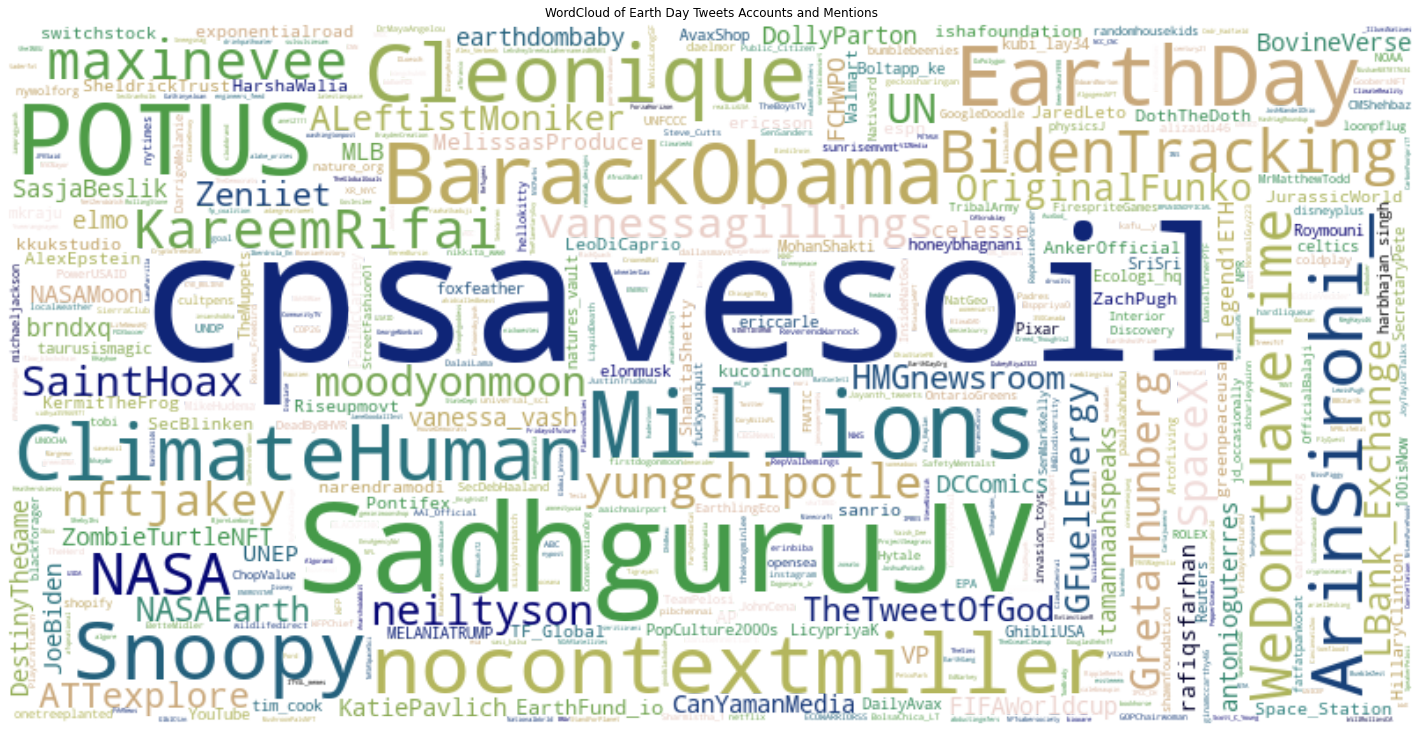

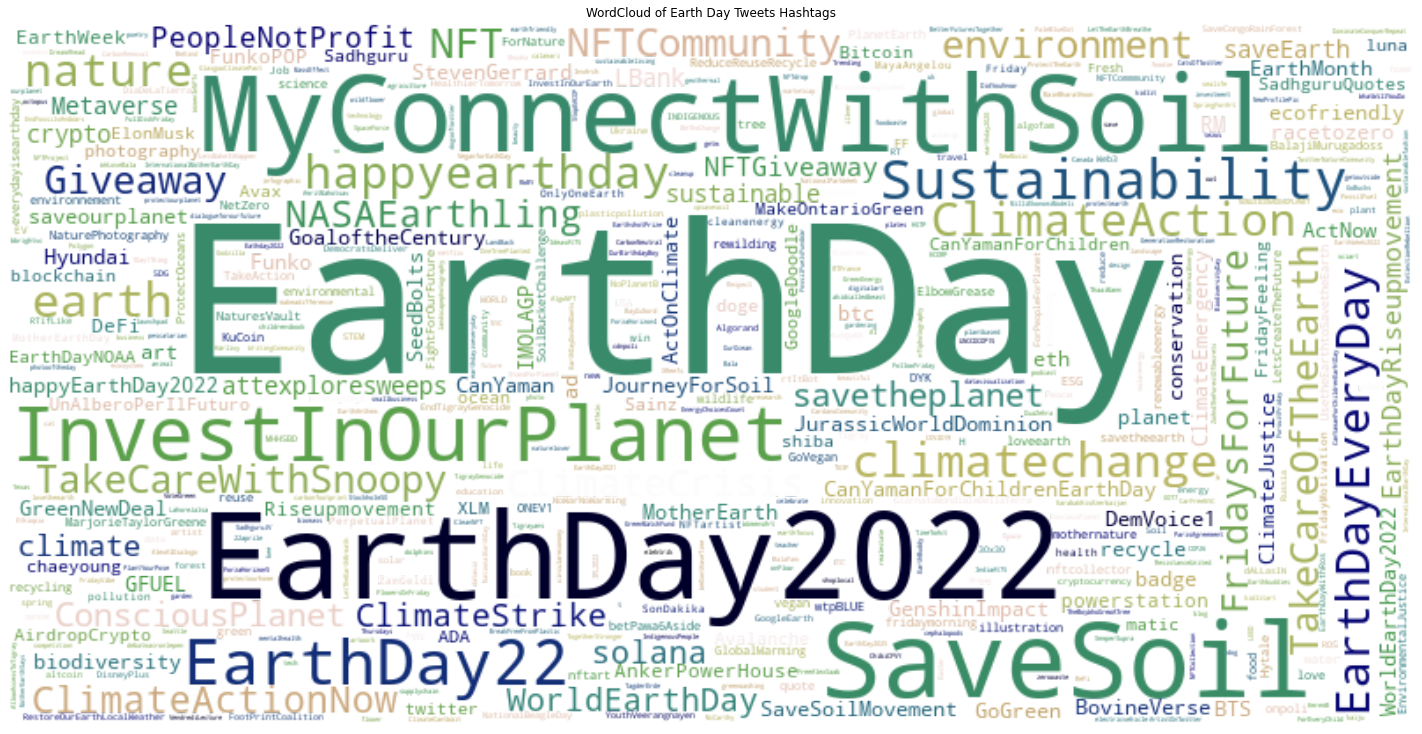

In [36]:
text = ' '.join(list(df.text_cleaned))
generate_wordcloud(text,
                   "WordCloud of Earth Day Tweets",
                   "images/WC_EarthDay.png")

tags = ' '.join([each_tag for tag_list in list(df.account_tags) for each_tag in tag_list])
generate_wordcloud(tags,
                   "WordCloud of Earth Day Tweets Accounts and Mentions",
                   "images/WC_Accounts.png")

tags = ' '.join([each_tag for tag_list in list(df.hash_tags) for each_tag in tag_list])
generate_wordcloud(tags,
                   "WordCloud of Earth Day Tweets Hashtags",
                   "images/WC_Hashtags.png")

Thanks for visiting :)